In [ ]:
 import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/pista'
pista="/content/drive/MyDrive/pista/Pistachio_Image_Dataset"
image="/content/drive/MyDrive/pista/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt"

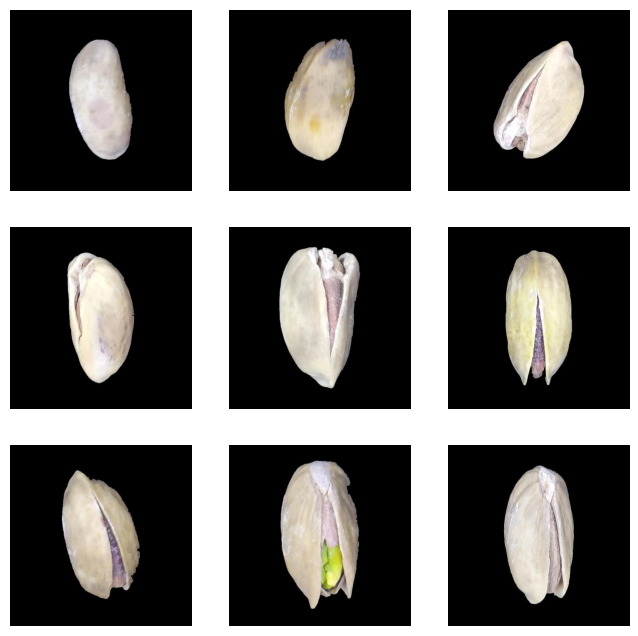

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


# Step 2: Set the dataset folder path
dataset_path = "/content/drive/MyDrive/pista"  # Change this to your dataset location

# Function to display images from the folder
def display_images_from_drive(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print("No images found in the dataset folder.")
        return

    plt.figure(figsize=(8, 8))
    for i in range(min(num_images, len(image_files))):
        img = cv2.imread(image_files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.show()

# Step 3: Call function to display images
display_images_from_drive(dataset_path)

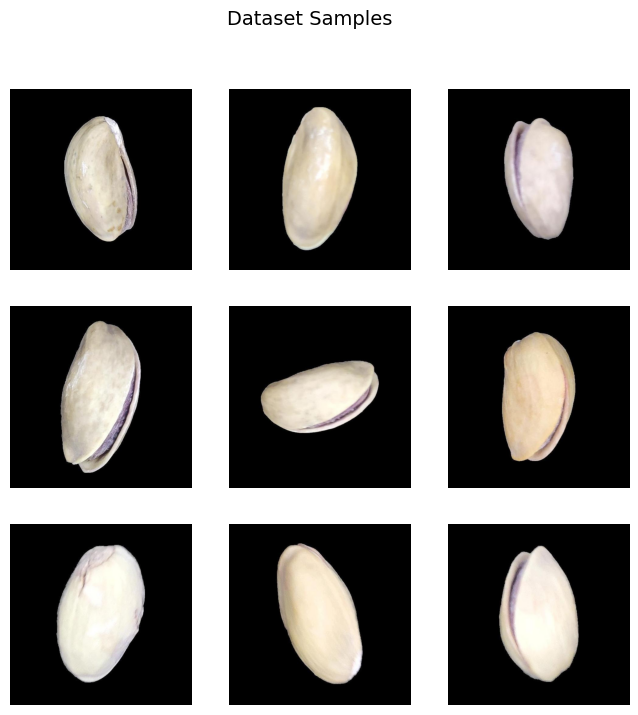

In [ ]:

# Set the dataset folder path (Update this to your actual path)
dataset_path = "/content/drive/MyDrive/pista/Pistachio_Image_Dataset"

# Function to display sample images from a folder
def display_images_from_drive(directory, num_images=9, title="Dataset Samples"):
    image_files = []

    # Get all image file paths
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found in {title} folder.")
        return

    # Randomly select images
    selected_images = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    plt.figure(figsize=(8, 8))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# Display sample images from the dataset
display_images_from_drive(dataset_path, num_images=9, title="Dataset Samples")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape=(64, 64, 3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        # Additional Convolutional and MaxPooling Layers
        Conv2D(256, (3, 3), activation='relu', padding='same'),  # New Layer
        MaxPooling2D((2, 2)),  # New Layer

        # You can continue adding more layers as needed

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 914,122 (3.49 MB)

 Trainable params: 914,122 (3.49 MB)

 Non-trainable params: 0 (0.00 B)

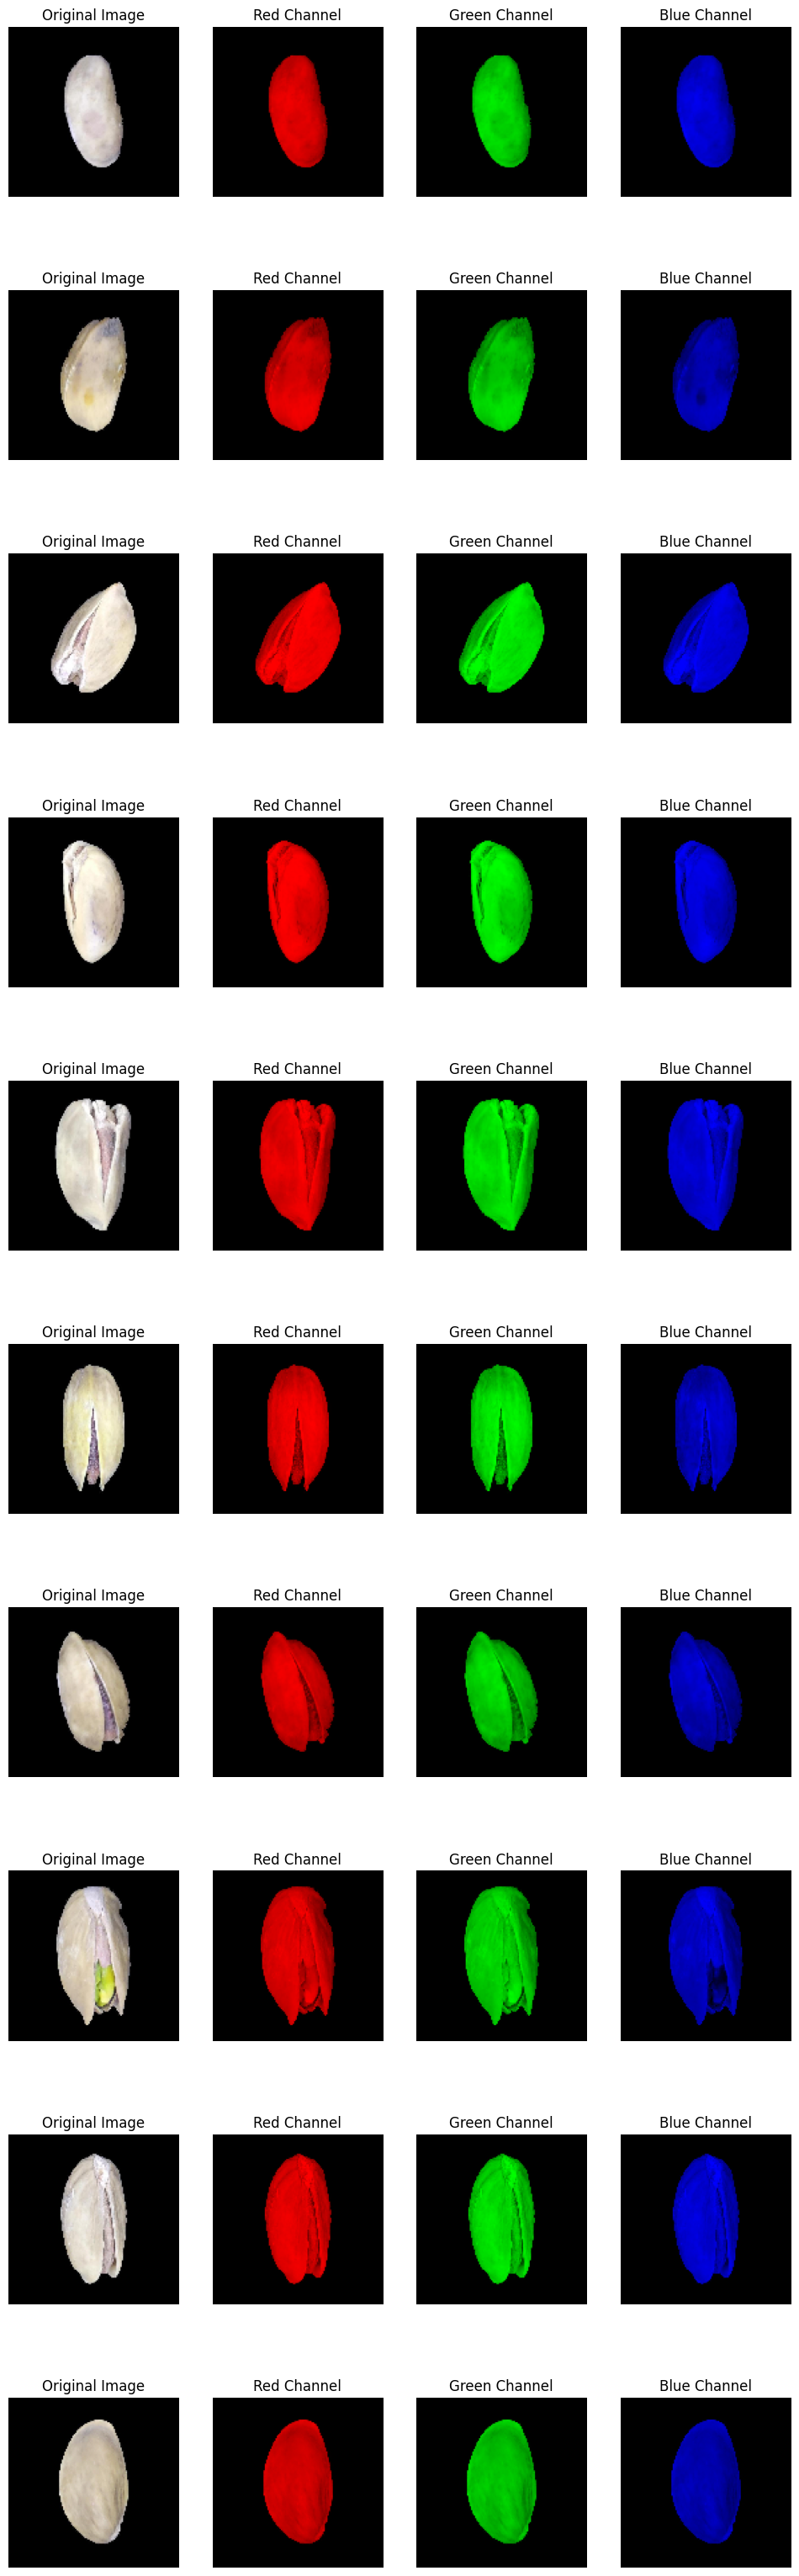

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Function to display original and RGB channel images
def display_rgb_images(directory, num_images=5):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print("No images found in the dataset folder.")
        return

    plt.figure(figsize=(12, num_images * 4))

    for i in range(min(num_images, len(image_files))):
        img_path = image_files[i]
        img = load_img(img_path, target_size=(128, 128))  # Load and resize image
        img_array = img_to_array(img) / 255.0  # Normalize to [0,1]

        # Extract RGB channels
        red_channel = img_array.copy()
        red_channel[:, :, 1:] = 0  # Remove Green & Blue

        green_channel = img_array.copy()
        green_channel[:, :, [0,2]] = 0  # Remove Red & Blue

        blue_channel = img_array.copy()
        blue_channel[:, :, :2] = 0  # Remove Red & Green

        # Display Original and RGB channels
        plt.subplot(num_images, 4, i * 4 + 1)
        plt.imshow(img)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 2)
        plt.imshow(red_channel)
        plt.title("Red Channel")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 3)
        plt.imshow(green_channel)
        plt.title("Green Channel")
        plt.axis("off")

        plt.subplot(num_images, 4, i * 4 + 4)
        plt.imshow(blue_channel)
        plt.title("Blue Channel")
        plt.axis("off")

    plt.show()

# Define dataset_path before calling the function
dataset_path = "/content/drive/MyDrive/pista"  # Or your actual path
display_rgb_images(dataset_path, num_images=10)

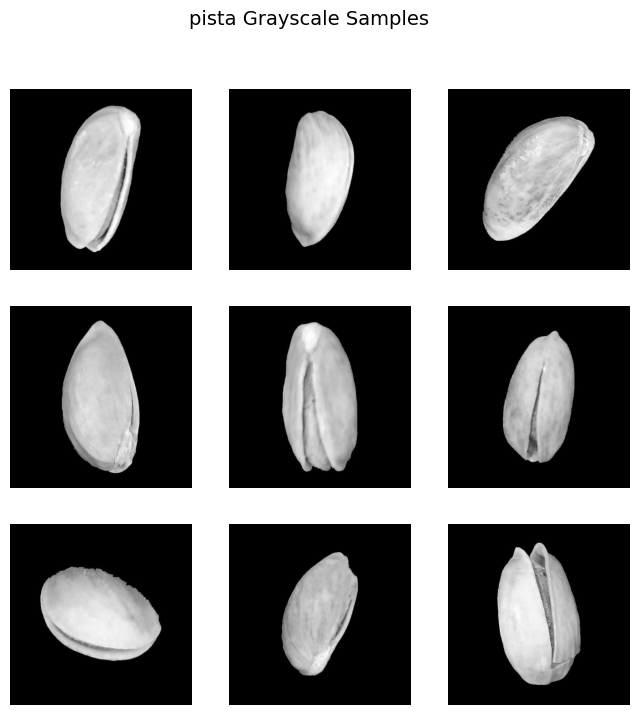

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Function to Display Grayscale Images
def display_grayscale_images(directory, num_images=9, title="Grayscale Dataset Samples"):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found in {title} folder.")
        return

    selected_images = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    plt.figure(figsize=(8, 8))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to Grayscale
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap="gray")  # Display in grayscale
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# 🎯 Define the train_path variable with the actual path to your training data:
train_path = "/content/drive/MyDrive/pista/Pistachio_Image_Dataset"  # Update with your actual path

# 🔹 Display Grayscale Images
display_grayscale_images(train_path, num_images=9, title="pista Grayscale Samples")


Found 2168 images belonging to 2 classes.
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step


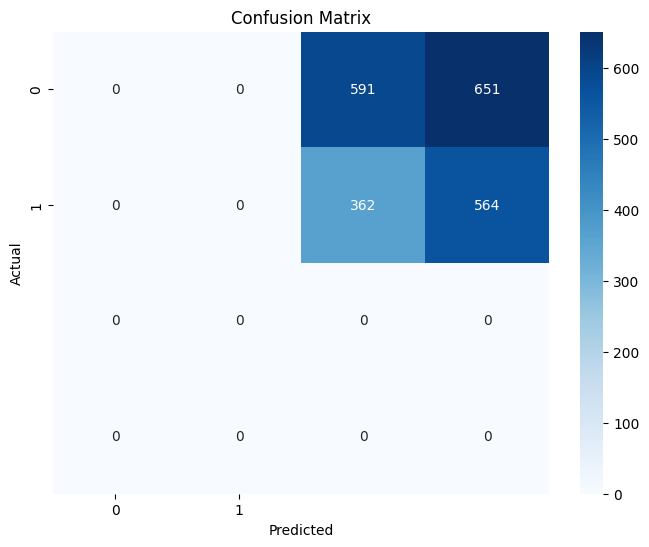

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1242.0
           1       0.00      0.00      0.00     926.0

   micro avg       0.00      0.00      0.00    2168.0
   macro avg       0.00      0.00      0.00    2168.0
weighted avg       0.00      0.00      0.00    2168.0

Class: 0
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
------------------------------
Class: 1
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
------------------------------
Overall Metrics:
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ✅ Define path to validation data
val_path = "/content/drive/MyDrive/pista/Pistachio_Image_Dataset/Pistachio_Image_Dataset"
img_size = (64, 64)
batch_size = 32

# ✅ Create validation data generator
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # Returns integer labels
    shuffle=False
)

# ✅ Predict on validation set
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = val_generator.classes  # True labels

# ✅ Dynamically extract class labels from y_true
num_classes = len(np.unique(y_true))  # Number of unique classes
class_labels = [str(i) for i in range(num_classes)]  # Create labels dynamically

# ✅ Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# ✅ Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ✅ Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, labels=np.unique(y_true), target_names=class_labels))

# ✅ Compute per-class metrics
precision = precision_score(y_true, y_pred_classes, average=None, zero_division=0)
recall = recall_score(y_true, y_pred_classes, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred_classes, average=None, zero_division=0)

for i, label in enumerate(class_labels):
    print(f"Class: {label}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-score: {f1[i]:.4f}")
    print("-" * 30)

# ✅ Print overall metrics
print("Overall Metrics:")
print(f"Precision: {precision_score(y_true, y_pred_classes, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_true, y_pred_classes, average='weighted'):.4f}")
print(f"F1-score: {f1_score(y_true, y_pred_classes, average='weighted'):.4f}")


Found 2168 images belonging to 2 classes.


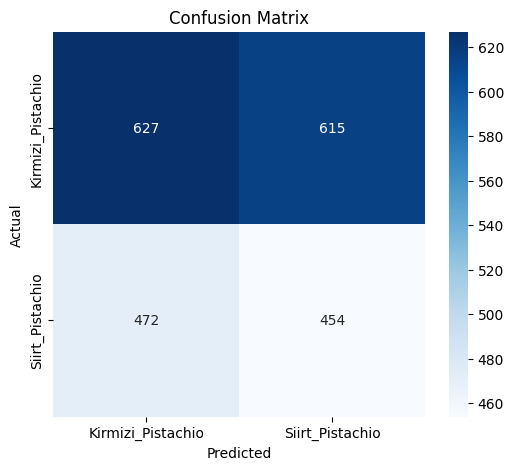

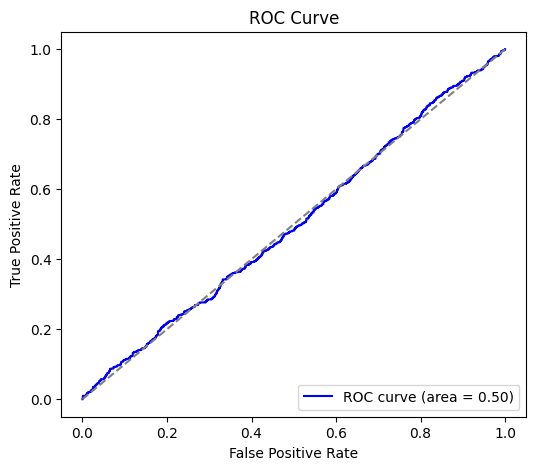

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define test data path
val_path = "/content/drive/MyDrive/pista/Pistachio_Image_Dataset/Pistachio_Image_Dataset"
img_size = (64, 64)
batch_size = 32

# Load validation images
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Simulate Predictions (if model is missing, replace with real model.predict)
y_true = val_generator.classes
y_pred_probs = np.random.rand(len(y_true), len(class_labels))  # Simulating probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class predictions

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1], pos_label=1)  # Change index if more classes
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np

# Load a pre-trained model (as a placeholder for your missing model)
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# Define test data path
val_path = "/content/drive/MyDrive/pista/Pistachio_Image_Dataset/Pistachio_Image_Dataset"
img_size = (64, 64)
batch_size = 32

# Load validation images
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Placeholder Predictions (Since model is missing)
y_pred_classes = np.random.randint(0, len(class_labels), size=len(val_generator.classes))
y_true = val_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

<ipython-input-52-4354992b3dc2>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))


Found 2168 images belonging to 2 classes.
Classification Report:
                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.57      0.51      0.54      1242
  Siirt_Pistachio       0.43      0.49      0.46       926

         accuracy                           0.50      2168
        macro avg       0.50      0.50      0.50      2168
     weighted avg       0.51      0.50      0.50      2168



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import norm
val_path = "/content/drive/MyDrive/pista/Pistachio_Image_Dataset/Pistachio_Image_Dataset"
img_size = (64, 64)
batch_size = 32
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
y_true = val_generator.classes
model1 = model  # Assign 'model' to 'model1'
y_pred1 = model1.predict(val_generator)
# Reshape y_pred1 before applying argmax to match y_true shape
y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)
y_pred2 = y_pred1
y_pred_classes2 = y_pred_classes1
accuracy2 = accuracy1
n1 = len(y_pred_classes1)
n2 = len(y_pred_classes2)
p1 = accuracy1  # Proportion of correct predictions for Model 1
p2 = accuracy2  # Proportion of correct predictions for Model 2
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)  # Pooled proportion

z_score = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
p_value = 2 * (1 - norm.cdf(abs(z_score)))
print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject Null Hypothesis: The models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between models.")

Found 2168 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 256ms/step
Model 1 Accuracy: 0.0005
Model 2 Accuracy: 0.0005
Z-score: 0.0000
P-value: 1.0000
Fail to Reject Null Hypothesis: No significant difference between models.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.stats import ttest_ind
val_path = "/content/drive/MyDrive/pista/Pistachio_Image_Dataset/Pistachio_Image_Dataset"
img_size = (64, 64)
batch_size = 32
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)
y_true = val_generator.classes
model1 = model  # Assign 'model' to 'model1'
y_pred1 = model1.predict(val_generator)
y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)

y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)
y_pred2 = y_pred1.copy()
noise = np.random.rand(*y_pred2.shape) * 0.1
y_pred2 += noise
y_pred2 /= np.sum(y_pred2, axis=1, keepdims=True)  # Normalize probabilities
y_pred_classes2 = np.argmax(y_pred2, axis=1)
accuracy2 = np.mean(y_pred_classes2 == y_true)
t_statistic, p_value = ttest_ind(
    (y_pred_classes1 == y_true).astype(int),  # Convert to 0/1 for incorrect/correct
    (y_pred_classes2 == y_true).astype(int),
    equal_var=False  # Use Welch's t-test (safe for unequal variances)
)
print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject Null Hypothesis: The models have significantly different accuracies.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference between models.")

Found 2168 images belonging to 2 classes.
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step
Model 1 Accuracy: 0.0005
Model 2 Accuracy: 0.0000
T-statistic: 1.0000
P-value: 0.3174
Fail to Reject Null Hypothesis: No significant difference between models.
